## Loading packages

In [24]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import seaborn as sns

from cell2location.plt import plot_spatial

import os

In [17]:
# import a module given the full path?
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

spec = importlib.util.spec_from_file_location("module.name", "/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/_utils.py")
_utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = _utils
spec.loader.exec_module(_utils)

In [3]:
sc.settings.set_figure_params(dpi=80,dpi_save=300)

In [20]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk'

## Read in adata

In [5]:
adata_vis = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/visium-FFPE_foetal_raw.h5ad')
adata_vis

AnnData object with n_obs × n_vars = 19973 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'sangerID', 'Publication', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'status', 'JC_edit'
    var: 'gene_ids', 'feature_types', 'genome', 'SYMBOL', 'mt'
    uns: 'spatial'
    obsm: 'MT', 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'

In [10]:
# add cell2loc output to .obs
# get the cell2loc output
cell2loc_out = adata_vis.obsm['q05_cell_abundance_w_sf'].copy()
## read in cell type name update dictionary
celltype_rename = utils.read_pkl('/nfs/team205/heart/anndata_objects/Foetal/fine_grain_rename_dictionary.pkl')
## update cell type name
cellnames = adata_vis.obsm['q05_cell_abundance_w_sf'].columns
cellnames = [x.split('q05cell_abundance_w_sf_')[1] for x in cellnames]
cellnames = [celltype_rename[x] for x in cellnames]
## add
adata_vis.obs[cellnames] = cell2loc_out

In [11]:
adata_vis

AnnData object with n_obs × n_vars = 19973 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'sangerID', 'Publication', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'status', 'JC_edit', 'AtrialCardiomyocytesLeft', 'AtrialCardiomyocytesRight', 'VentricularCardiomyocytesLeftCompact', 'VentricularCardiomyocytesRightCompact', 'VentricularCardiomyocytesLeftTrabeculated', 'VentricularCardiomyocytesRightTrabeculated', 'SinoatrialNodeCardiomyocytes', 'AtrioventricularNodeCardiomyocytes', 'VentricularConductionSystemProximal', 'VentricularConductionSystemDistal', 'GreatVesselAdventitialFibroblasts', 'CoronaryVesselAdventitialFibroblasts', 'MyocardialInterstitialFib

## Plotting

In [15]:
set(adata_vis.obs['sample'])

{'BHF_F_Hea13295830', 'BHF_F_Hea13295831'}

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


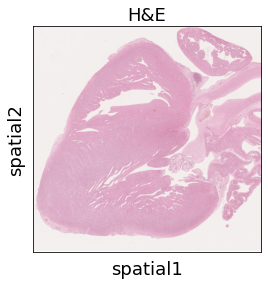

In [18]:
slide = _utils.select_multislide(adata_vis, ['BHF_F_Hea13295830'])
sc.pl.spatial(slide,cmap='RdPu',color='JC_edit', ncols=5, wspace=0,
              size=0,img_key='hires',alpha_img=1,vmin=0, vmax='p99.4',
             title='H&E', legend_loc=None)

In [19]:
?plot_spatial

Signature: plot_spatial(adata, color, img_key='hires', show_img=True, **kwargs)
Docstring:
Plot spatial abundance of cell types (regulatory programmes) with colour gradient
and interpolation (from Visium anndata).

This method supports only 7 cell types with these colours (in order, which can be changed using reorder_cmap).
'yellow' 'orange' 'blue' 'green' 'purple' 'grey' 'white'

:param adata: adata object with spatial coordinates in adata.obsm['spatial']
:param color: list of adata.obs column names to be plotted
:param kwargs: arguments to plot_spatial_general
:return: matplotlib figure
File:      ~/my-conda-envs/cellpymc/lib/python3.7/site-packages/cell2location/plt/plot_spatial.py
Type:      function


/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


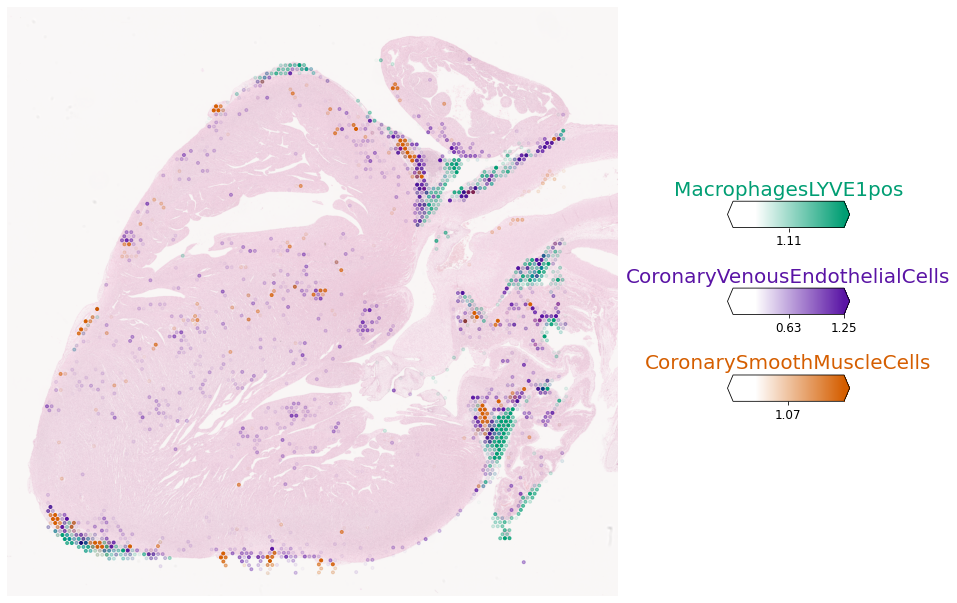

In [26]:
# select up to 6 clusters
# https://github.com/BayraktarLab/cell2location/blob/bd2aae833f81d8ab68684aa44f863b36e3af0aed/cell2location/plt/plot_spatial.py#L108

slide = _utils.select_multislide(adata_vis, ['BHF_F_Hea13295830'])

clust_labels = ['MacrophagesLYVE1pos',
                'CoronaryVenousEndothelialCells',
                'CoronarySmoothMuscleCells'
                ]
clust_col = ['' + str(i) for i in clust_labels] # in case column names differ from labels

plt.rcParams['axes.grid'] = False
with mpl.rc_context({'figure.figsize': (15, 15)}):
    fig = plot_spatial(
        adata=slide,
        # labels to show on a plot
        color=clust_col, labels=clust_labels,
        show_img=True, img_alpha=0.5,
        # 'fast' (white background) or 'dark_background'
        style='fast',
        # limit color scale at 99.2% quantile of cell abundance
        max_color_quantile=0.997,
        # size of locations (adjust depending on figure size)
        circle_diameter=3,
        colorbar_position='right',
        colorbar_shape = {'vertical_gaps': 0.5, 'horizontal_gaps': 0.3,
                                    'width': 0.2, 'height': 0.1},
        # crop_x=(650,820),
        # crop_y=(1200,1420),
        reorder_cmap = [3,4,1], # 'yellow' 'orange' 'blue' 'green' 'purple' 'grey' 'white'
    )
    plt.savefig(f"{figdir}/Visium_MP-Vessels_BHF_F_Hea13295830.pdf", bbox_inches="tight",dpi=300)

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


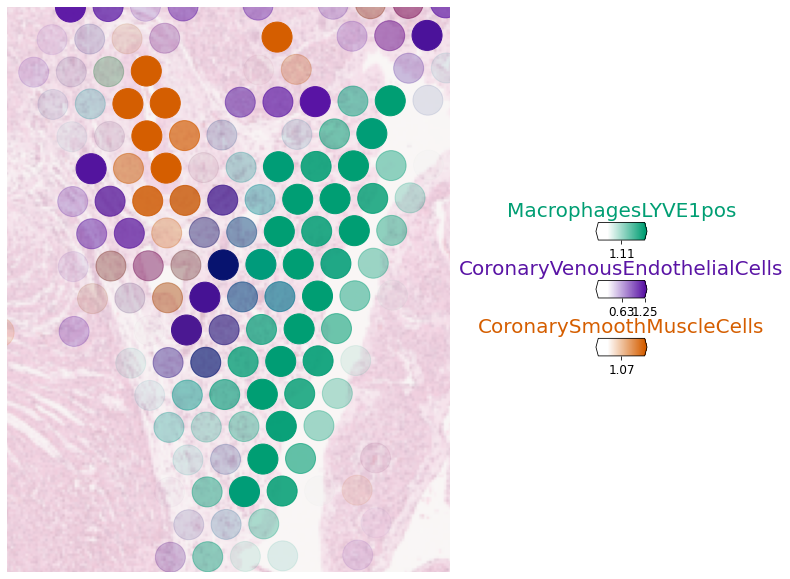

In [27]:
# select up to 6 clusters
# https://github.com/BayraktarLab/cell2location/blob/bd2aae833f81d8ab68684aa44f863b36e3af0aed/cell2location/plt/plot_spatial.py#L108

slide = _utils.select_multislide(adata_vis, ['BHF_F_Hea13295830'])

clust_labels = ['MacrophagesLYVE1pos',
                'CoronaryVenousEndothelialCells',
                'CoronarySmoothMuscleCells'
                ]
clust_col = ['' + str(i) for i in clust_labels] # in case column names differ from labels

plt.rcParams['axes.grid'] = False
with mpl.rc_context({'figure.figsize': (12, 10)}):
    fig = plot_spatial(
        adata=slide,
        # labels to show on a plot
        color=clust_col, labels=clust_labels,
        show_img=True, img_alpha=0.5,
        # 'fast' (white background) or 'dark_background'
        style='fast',
        # limit color scale at 99.2% quantile of cell abundance
        max_color_quantile=0.997,
        # size of locations (adjust depending on figure size)
        circle_diameter=30,
        colorbar_position='right',
        colorbar_shape = {'vertical_gaps': 0.5, 'horizontal_gaps': 0.4,
                                    'width': 0.1, 'height': 0.1},
        crop_x=(1500,1680),
        crop_y=(1280,1510),
        reorder_cmap = [3,4,1] # 'yellow' 'orange' 'blue' 'green' 'purple' 'grey' 'white'
    )
    plt.savefig(f"{figdir}/Visium_MP-Vessels_BHF_F_Hea13295830_zoomin1.pdf", bbox_inches="tight",dpi=300)

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


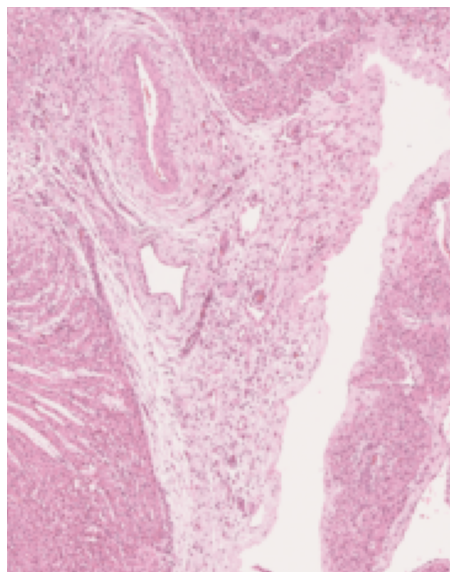

In [28]:
# select up to 6 clusters
# https://github.com/BayraktarLab/cell2location/blob/bd2aae833f81d8ab68684aa44f863b36e3af0aed/cell2location/plt/plot_spatial.py#L108

slide = _utils.select_multislide(adata_vis, ['BHF_F_Hea13295830'])

clust_labels = ['MacrophagesLYVE1pos',
                'CoronaryVenousEndothelialCells',
                'CoronarySmoothMuscleCells'
                ]
clust_col = ['' + str(i) for i in clust_labels] # in case column names differ from labels

plt.rcParams['axes.grid'] = False
with mpl.rc_context({'figure.figsize': (12, 10)}):
    fig = plot_spatial(
        adata=slide,
        # labels to show on a plot
        color=clust_col, labels=clust_labels,
        show_img=True, img_alpha=1,
        # 'fast' (white background) or 'dark_background'
        style='fast',
        # limit color scale at 99.2% quantile of cell abundance
        max_color_quantile=0.997,
        # size of locations (adjust depending on figure size)
        circle_diameter=0,
        colorbar_position=None,
        colorbar_shape = {'vertical_gaps': 0.5, 'horizontal_gaps': 0.4,
                                    'width': 0.1, 'height': 0.1},
        crop_x=(1500,1680),
        crop_y=(1280,1510),
        reorder_cmap = [3,4,1] # 'yellow' 'orange' 'blue' 'green' 'purple' 'grey' 'white'
    )
    plt.savefig(f"{figdir}/Visium_MP-Vessels_BHF_F_Hea13295830_zoomin1_HE.pdf", bbox_inches="tight",dpi=300)

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


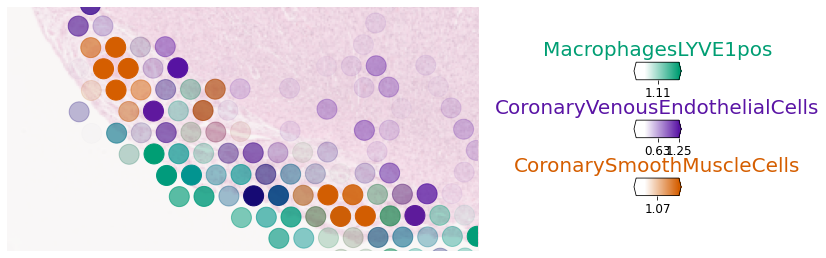

In [29]:
# select up to 6 clusters
# https://github.com/BayraktarLab/cell2location/blob/bd2aae833f81d8ab68684aa44f863b36e3af0aed/cell2location/plt/plot_spatial.py#L108

slide = _utils.select_multislide(adata_vis, ['BHF_F_Hea13295830'])

clust_labels = ['MacrophagesLYVE1pos',
                'CoronaryVenousEndothelialCells',
                'CoronarySmoothMuscleCells'
                ]
clust_col = ['' + str(i) for i in clust_labels] # in case column names differ from labels

plt.rcParams['axes.grid'] = False
with mpl.rc_context({'figure.figsize': (12, 10)}):
    fig = plot_spatial(
        adata=slide,
        # labels to show on a plot
        color=clust_col, labels=clust_labels,
        show_img=True, img_alpha=0.5,
        # 'fast' (white background) or 'dark_background'
        style='fast',
        # limit color scale at 99.2% quantile of cell abundance
        max_color_quantile=0.997,
        # size of locations (adjust depending on figure size)
        circle_diameter=20,
        colorbar_position='right',
        colorbar_shape = {'vertical_gaps': 0.5, 'horizontal_gaps': 0.6,
                                    'width': 0.1, 'height': 0.1},
        crop_x=(90,380),
        crop_y=(1640,1790),
        reorder_cmap = [3,4,1] # 'yellow' 'orange' 'blue' 'green' 'purple' 'grey' 'white'
    )
    plt.savefig(f"{figdir}/Visium_MP-Vessels_BHF_F_Hea13295830_zoomin2.pdf", bbox_inches="tight",dpi=300)

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


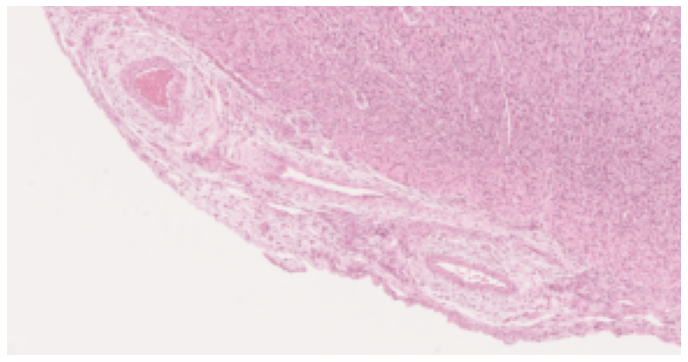

In [30]:
# select up to 6 clusters
# https://github.com/BayraktarLab/cell2location/blob/bd2aae833f81d8ab68684aa44f863b36e3af0aed/cell2location/plt/plot_spatial.py#L108

slide = _utils.select_multislide(adata_vis, ['BHF_F_Hea13295830'])

clust_labels = ['MacrophagesLYVE1pos',
                'CoronaryVenousEndothelialCells',
                'CoronarySmoothMuscleCells'
                ]
clust_col = ['' + str(i) for i in clust_labels] # in case column names differ from labels

plt.rcParams['axes.grid'] = False
with mpl.rc_context({'figure.figsize': (12, 10)}):
    fig = plot_spatial(
        adata=slide,
        # labels to show on a plot
        color=clust_col, labels=clust_labels,
        show_img=True, img_alpha=1,
        # 'fast' (white background) or 'dark_background'
        style='fast',
        # limit color scale at 99.2% quantile of cell abundance
        max_color_quantile=0.997,
        # size of locations (adjust depending on figure size)
        circle_diameter=0,
        colorbar_position=None,
        colorbar_shape = {'vertical_gaps': 0.5, 'horizontal_gaps': 0.6,
                                    'width': 0.1, 'height': 0.1},
        crop_x=(90,380),
        crop_y=(1640,1790),
        reorder_cmap = [3,4,1] # 'yellow' 'orange' 'blue' 'green' 'purple' 'grey' 'white'
    )
    plt.savefig(f"{figdir}/Visium_MP-Vessels_BHF_F_Hea13295830_zoomin2_HE.pdf", bbox_inches="tight",dpi=300)